# K-means clustering Group 13

## Imports

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

# Selecting relevant feature found from the EDA
## Min max scaling the features
- [Normalise data](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)


In [5]:
# Load the data
spotify_df = pd.read_csv('../updated_spotify_data.csv')

 # Add the selected features from the dataset
selected_features = ['energy', 'loudness', 'liveness', 'instrumentalness', 'danceability']
spotify_df = spotify_df[selected_features]

# Normalise the data using Min Max scaling
scaler = MinMaxScaler()
spotify_df[selected_features[:-1]] = scaler.fit_transform(spotify_df[selected_features[:-1]])

# Split data into training and testing sets
X = spotify_df[selected_features[:-1]]
y = spotify_df['danceability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Running the k-means classifier on the model
- [Confusion Matrix](https://www.w3schools.com/python/python_ml_confusion_matrix.asp) - Confusion matrix reference

Accuracy (K-Nearest Neighbors): 0.6685
F1-score (K-Nearest Neighbors): 0.7370925529383774
Recall (K-Nearest Neighbors): 0.7861170632682982
Training time: 0.0600888729095459
Confusion Matrix (K-Nearest Neighbors):
[[ 6114  6152]
 [ 3793 13941]]
Classification Report (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.62      0.50      0.55     12266
           1       0.69      0.79      0.74     17734

    accuracy                           0.67     30000
   macro avg       0.66      0.64      0.64     30000
weighted avg       0.66      0.67      0.66     30000



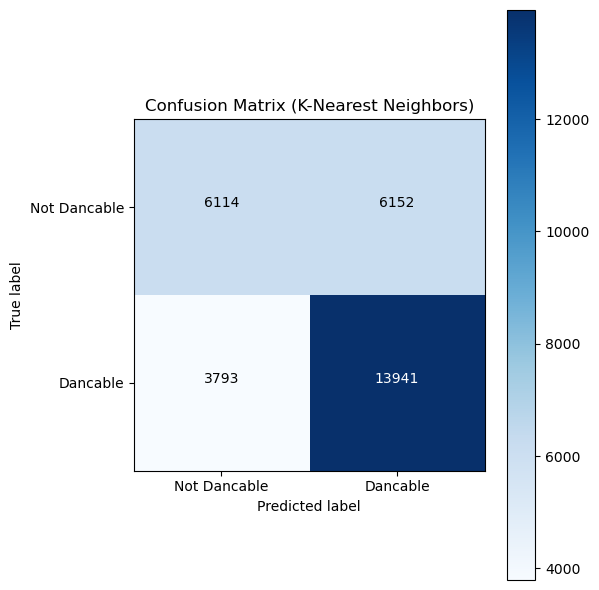

In [6]:
# Convert labels to binary classification 
threshold = 0.5
y_train_binary = np.where(y_train > threshold, 1, 0)
y_test_binary = np.where(y_test > threshold, 1, 0)


# Initialise K Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=9)
start_time = time.time()

# Train the model
knn_classifier.fit(X_train, y_train_binary)
end_time = time.time()
training_time = end_time - start_time


# Predict on test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate model
accuracy_knn = accuracy_score(y_test_binary, y_pred_knn)
f1_knn = f1_score(y_test_binary, y_pred_knn)
recall_knn = recall_score(y_test_binary, y_pred_knn)

# Print metrics
print(f"Accuracy (K-Nearest Neighbors): {accuracy_knn}")
print(f"F1-score (K-Nearest Neighbors): {f1_knn}")
print(f"Recall (K-Nearest Neighbors): {recall_knn}")
print(f"Training time: {training_time}")

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test_binary, y_pred_knn)
print(f"Confusion Matrix (K-Nearest Neighbors):\n{conf_matrix_knn}")

# Classification Report
class_report_knn = classification_report(y_test_binary, y_pred_knn)
print(f"Classification Report (K-Nearest Neighbors):\n{class_report_knn}")

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (K-Nearest Neighbors)')
plt.colorbar()

classes = ['Not Dancable', 'Dancable']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = conf_matrix_knn.max() / 2
for i in range(conf_matrix_knn.shape[0]):
    for j in range(conf_matrix_knn.shape[1]):
        plt.text(j, i, format(conf_matrix_knn[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_knn[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Calculate different intertia for the different clustering values
- [Intertia](https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet) - Inertia background

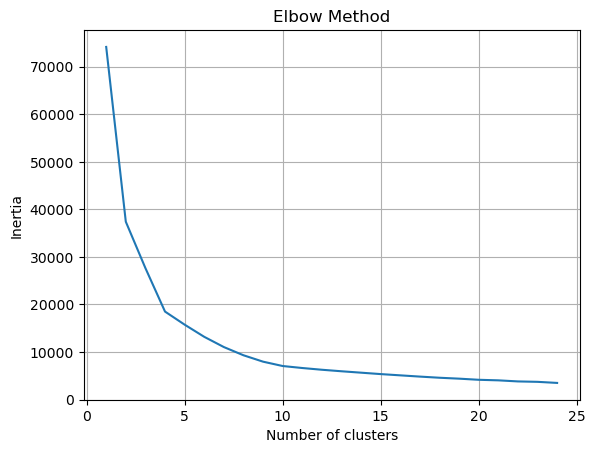

Training time is: 4.394679069519043


In [32]:
#tried to use this to check the clusters, but it does not run
means = []
inertia = []

for k in range(1,25):
    kmeans = KMeans(n_clusters=k, n_init=10)
    start_time = time.time()
    kmeans.fit(spotify_df)
    end_time = time.time()
    training_time = end_time - start_time
    means.append(k)
    inertia.append(kmeans.inertia_)

plt.plot(means, inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
print(f"Training time is: {training_time}")

# Fitting the model to the data to see what some predictions look like

In [33]:
# Fit the data to the training model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

/Users/alisiddique/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

# View prediction data and check if it is binary

In [34]:
clusters = kmeans.predict(X_train)
print(clusters[:10])

[0 0 0 1 0 0 0 1 0 0]


# Using Seaborn
## Pair plot to visualise the results of K-Means clustering on your data using the Seaborn library
- [Seaborn documentation](https://seaborn.pydata.org/) 

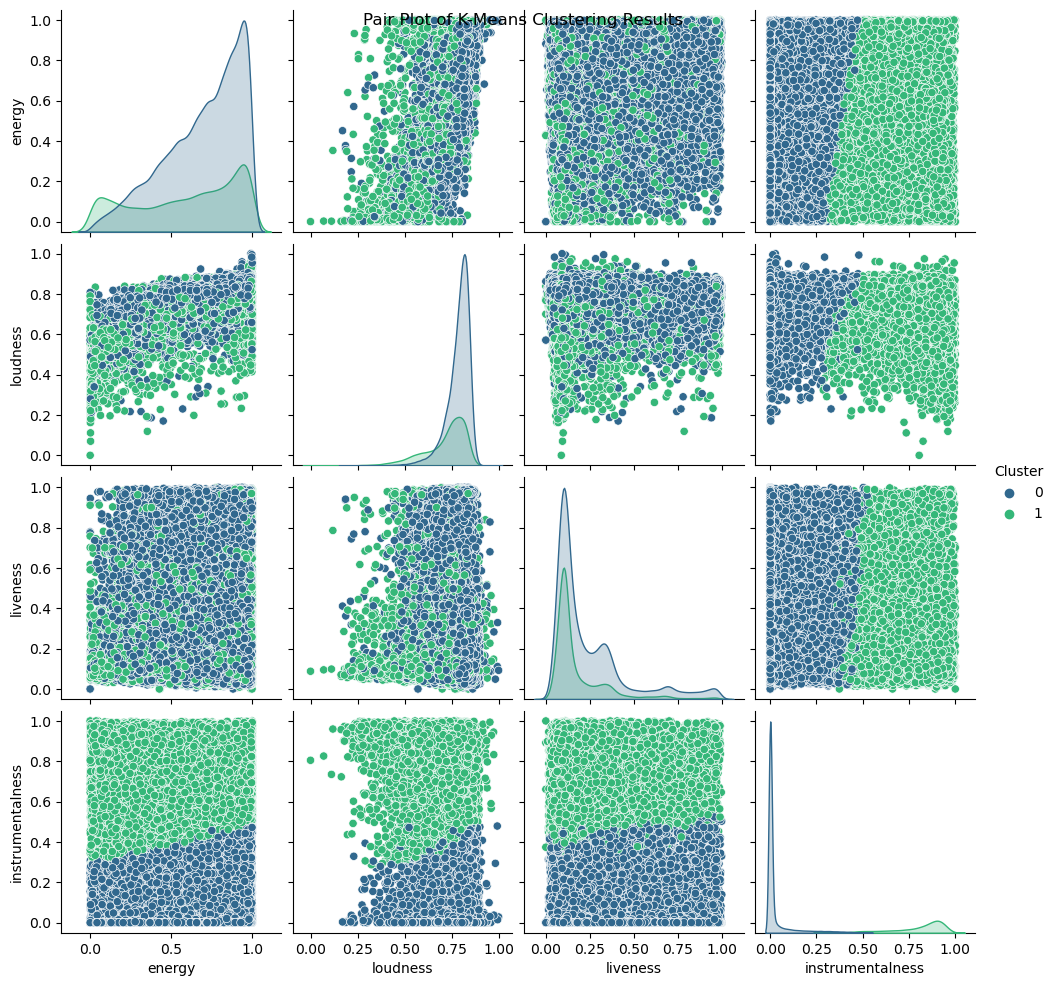

In [35]:
import seaborn as sns
# Create a DataFrame for visualization with cluster assignments
clustered_data = pd.DataFrame(data=X_train, columns=['energy', 'loudness', 'liveness', 'instrumentalness'])
clustered_data["Cluster"] = clusters

# Create pair plot 
sns.pairplot(data=clustered_data, hue="Cluster", palette="viridis", markers="o", diag_kind="kde")
plt.suptitle("Pair Plot of K-Means Clustering Results")
plt.show()

# Display the silhouette score for the model
- [Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) - API reference
- [Article on Silhoutte](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c)
- [Introduction to silhouette](https://medium.com/@hazallgultekin/what-is-silhouette-score-f428fb39bf9a#:~:text=array%20called%20labels%20.-,4.,score%20is%20calculated%20and%20printed.&text=%3A%22%2C%20silhouette_avg)

In [36]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train, clusters)

0.5175296026386976

# Add Principal component analysis to the data
## Display the clusters assignments on to a chart

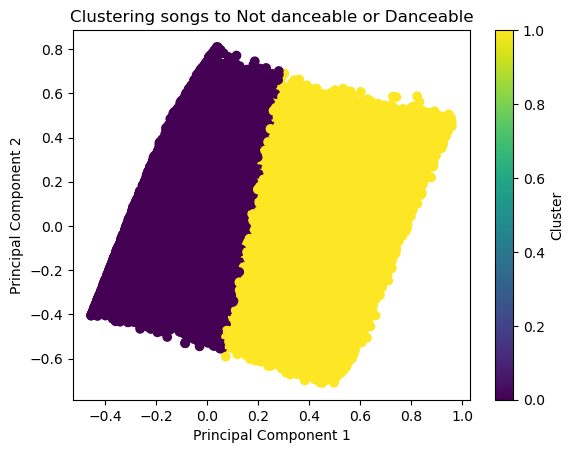

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
spotify_df_2d = pca.fit_transform(X_train)

# Create a scatter plot and color points based on cluster assignments
plt.scatter(spotify_df_2d[:, 0], spotify_df_2d[:, 1], c=clusters, cmap='viridis')  
plt.title('Clustering songs to Not danceable or Danceable')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster') 
plt.show()

# Add a heatmap using seaborn

<Axes: >

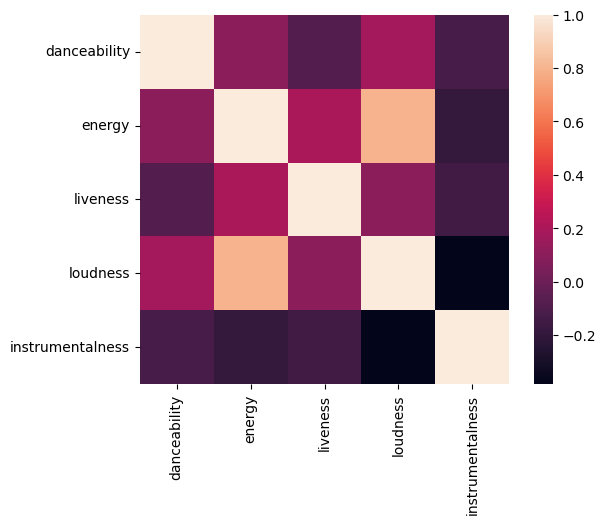

In [38]:
import seaborn as sns

spotify_df.dtypes

spotify_df1 = spotify_df[[ 'danceability', 'energy', 'liveness', 'loudness', 'instrumentalness']]

cor = spotify_df1.corr()

sns.heatmap(cor, square = True)


# Creating a set of subplots for visualising the clusters produced by a K-Means clustering algorithm.

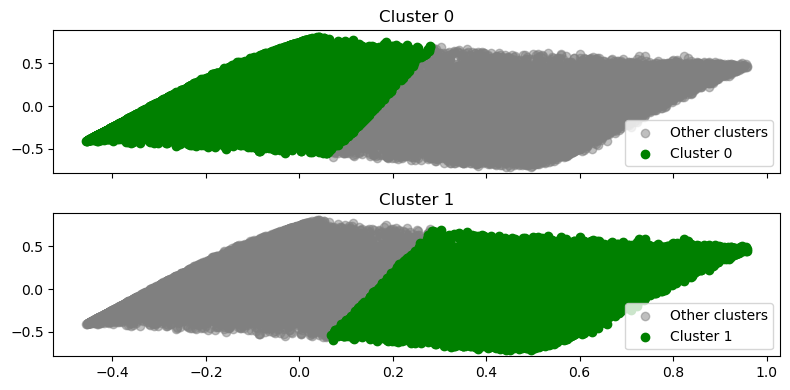

In [39]:
import matplotlib.pyplot as plt
import numpy as np

unique_clusters = np.unique(clusters)
num_clusters = len(unique_clusters)

# Create subplots for each unique cluster
fig, axs = plt.subplots(nrows=num_clusters, figsize=(8, 2 * num_clusters), sharex=True, sharey=True)

for i, cluster in enumerate(unique_clusters):
    # Select data points belonging to the current cluster
    spotify_df_cluster = spotify_df_2d[clusters == cluster]
    
    # Select data points belonging to other clusters
    spotify_df_other_clusters = spotify_df_2d[clusters != cluster]
    
    # Plot data points of other clusters in gray with reduced opacity
    axs[i].scatter(spotify_df_other_clusters[:, 0], spotify_df_other_clusters[:, 1], c='gray', label='Other clusters', alpha=0.5)
    
    # Plot data points of the current cluster in green
    axs[i].scatter(spotify_df_cluster[:, 0], spotify_df_cluster[:, 1], c='green', label=f'Cluster {cluster}')
    
    axs[i].set_title(f'Cluster {cluster}')
    axs[i].legend()

# Adjust the layout
plt.tight_layout()
plt.show()


# Visualise the characteristics of clusters generated by a K-Means clustering algorithm

           energy  loudness  liveness  instrumentalness
cluster                                                
0        0.691437   0.78430  0.244676          0.032058
1        0.582489   0.71563  0.180989          0.801654


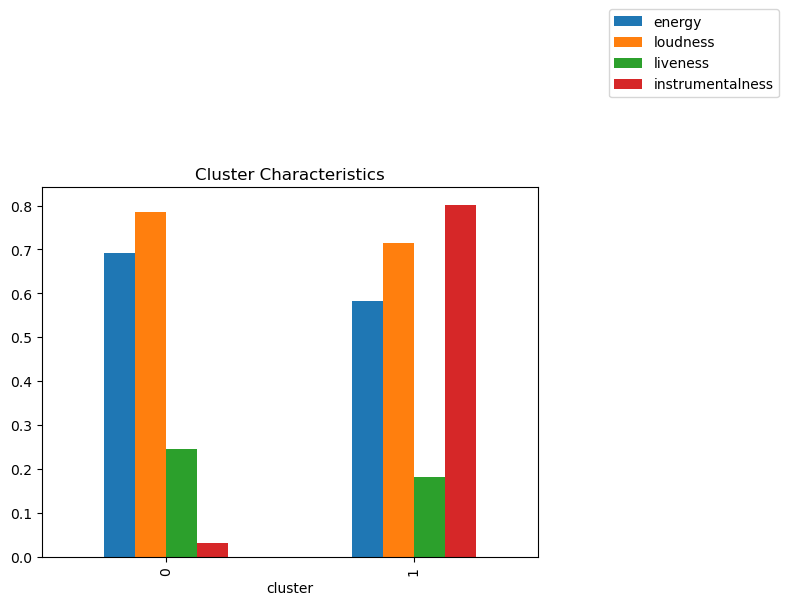

In [40]:
clustered_spotify_df = X_train.copy()
clustered_spotify_df['cluster'] = clusters

cluster_means = clustered_spotify_df.groupby('cluster').mean()
print(cluster_means)

cluster_means.plot(kind='bar')
plt.title('Cluster Characteristics')
plt.legend(bbox_to_anchor=(1.5,1.5))
plt.show()

# Visualise the results of K-Means clustering on the loudness and energy features of a dataset

/Users/alisiddique/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


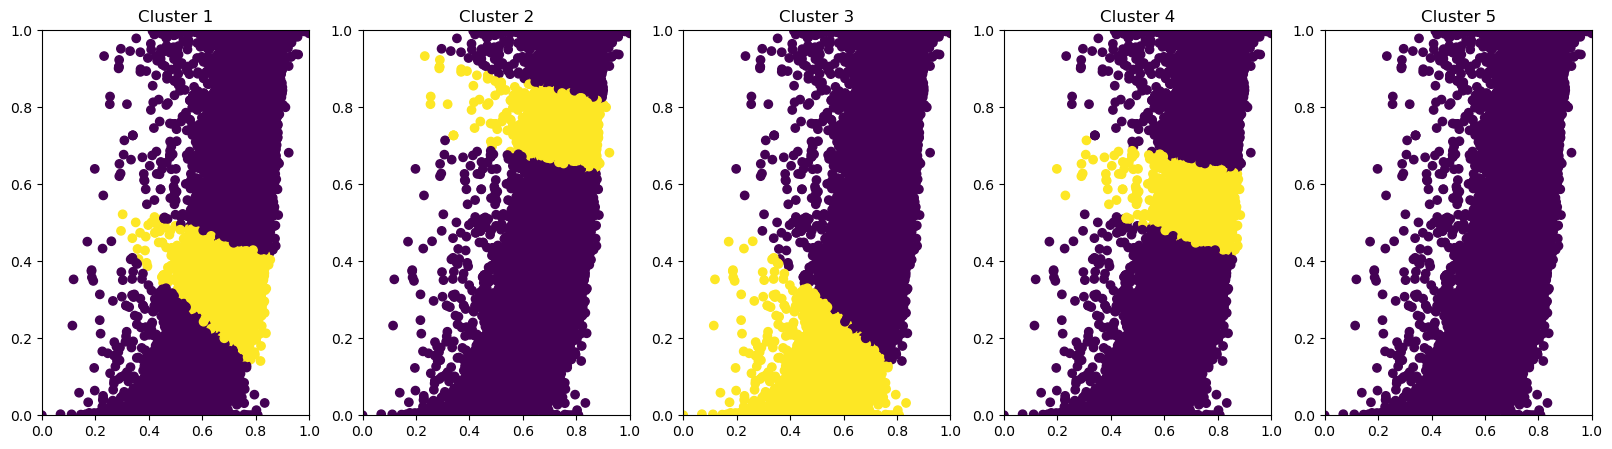

In [41]:

features_for_clustering = spotify_df[['loudness', 'energy']]

# Applying K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=1)
spotify_df['cluster_label'] = kmeans.fit_predict(features_for_clustering)

# Plotting
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
# Loop through the axis and display the loudness and energy on scatter plot
for i, ax in enumerate(axs, start=1):
    ax.scatter(x=spotify_df['loudness'], y=spotify_df['energy'], c=spotify_df['cluster_label'] == i)
    ax.set_ylim(spotify_df['energy'].min(), spotify_df['energy'].max())
    ax.set_xlim(spotify_df['loudness'].min(), spotify_df['loudness'].max())
    ax.set_title(f'Cluster {i}')

plt.show()
